# U.S. Medical Insurance Costs

US Medical Insurance dataset 

* Age = Age
* Sex = `1` Male `0` Female
* BMI = Body Mass index 
* Children = Childern amount
* Smoker = Smoker or not
* Region = Region
* Chargers = Insurance cost chargers

In [1]:
# Importing Libaries 

import pandas as pd
import numpy as np
import csv
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load up the DataFrame
df = pd.read_csv("insurance.csv")

In [3]:
# Let's view first 5 column of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no missing values for our dataset.

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

In [14]:
def load_list_to_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst


load_list_to_data(ages, "insurance.csv", 'age');
load_list_to_data(sexes , "insurance.csv", 'sex');
load_list_to_data(bmis , "insurance.csv", 'bmi');
load_list_to_data(num_children , "insurance.csv", 'children');
load_list_to_data(smoker_statuses , "insurance.csv", 'smoker');
load_list_to_data(regions , "insurance.csv", 'region');
load_list_to_data(insurance_charges , "insurance.csv", 'charges');

In [8]:
class PatientInfo:
    
    def __init__(self, patient_age, patient_sex, patient_bmi,
                 patient_children, patient_smoke, patient_region, patient_charge):
        self.patient_age = patient_age
        self.patient_sex = patient_sex
        self.patient_bmi = patient_bmi
        self.patient_children = patient_children
        self.patient_smoke = patient_smoke
        self.patient_region = patient_region
        self.patient_charge = patient_charge

    def average_smoker(self):

    	total_smokers = []
    	total_na_smoker = []

    	for element in self.patient_smoke:
    		if element == 'yes':
    			total_smokers.append(element)
    		elif element == 'no':
    			total_na_smoker.append(element)

    	total_smoker_mean = round(len(total_smokers) / len(self.patient_smoke), 3)
    	total_na_smoker_mean = round(len(total_na_smoker) / len(self.patient_smoke), 3)

    	print("Average patients that smokes:", total_smoker_mean)
    	print("Average patients that do not smoke:", total_na_smoker_mean)

    	if total_smoker_mean > total_na_smoker_mean:
    		print("According currenlty our database indicates average person that smokes greater than people does not smoke.")
    	elif total_na_smoker_mean > total_smoker_mean:
    		print('According currently our database indicates average person does not smoke greater than people who actually smoke.')    

    def update_age(self, new_age):
    	""" Updates Patient's age """ 
    	self.patient_ages = new_age
    	new_age = int(new_age)
    	print("Patient's new age is {}".format(self.patient_age))

    def update_children(self, num_of_child):
    	self.patient_children = num_of_child
    	
    	
    	if num_of_child <= 0:
    		print(f'You have no child.')
    		
    	elif num_of_child == 1:
    		print(f"You have got a single child.")
    	else:
    		print(f"You have {self.patient_children} children's.")

    def update_smoke(self, update_smoke=None):

    	if update_smoke == 0:
      		print("Well done, smoking it is not good for you plus makes your insurance cheaper.")

    	elif update_smoke >= 1:
      		print("Consider quit smoking to have a healty life and make your insurance cheaper.")

    def change_of_sex(self, gender=None):

    	if type(gender) is int:
    		print('Number is invalid entry. Enter a your gender')
    	else:
    		print(f"Succed. Information has been changed to {gender}.")


    def analyze_ages(self): # Copied.
        # initialize total age at zero
        total_age = 0
        # iterate through all ages in the ages list
        for age in self.patient_age:
            # sum of the total age
            total_age += int(age)
        # return total age divided by the length of the patient list
        return ("Average Patient Age: " + str(round(total_age/len(self.patient_age), 2)) + " years")

    def create_dictionary(self):
        self.patients_dictionary = {}
        self.patients_dictionary["Age"] = [int(age) for age in self.patient_age]
        self.patients_dictionary["Sex"] = self.patient_sex
        self.patients_dictionary["BMI"] = self.patient_bmi
        self.patients_dictionary["Num Of Child"] = self.patient_children
        self.patients_dictionary["Smoke Status"] = self.patient_smoke
        self.patients_dictionary["Regions"] = self.patient_region
        self.patients_dictionary["charges"] = self.patient_charge
        return self.patients_dictionary

    def gender_count(self):
    	male_count = 0
    	female_count = 0

    	for gender in self.patient_sex:

    		if gender == 'male':
    			male_count += 1

    		elif gender == 'female':
    			female_count += 1
    	print("Male Count:", str(male_count))
    	print("Female Count:", str(female_count))

    def unique_region(self):
    	unique = []

    	for element in self.patient_region:
    		if element not in unique:
    			unique.append(element)
    	return unique

    def average_charges(self):

    	total_charges = 0 

    	for element in self.patient_charge:

    		total_charges += float(element)
    	return ("Average Yearly Medical Insurance Charges: " +  
                str(round(total_charges/len(self.patient_charge), 2)) + " dollars.")

    def average_gender(self):

    	total_male = []
    	total_female = []

    	for element in self.patient_sex:

    		if element == 'male':
    			total_male.append(element)
    	
    		elif element == 'female':
    			total_female.append(element)

    	print("According in our data set we have got total of males", len(total_male),
    	 "average Male", round(len(total_male) / len(self.patient_sex), 2))

    	print("According in our data set we have got total of Females", len(total_female),
        "average Female", round(len(total_female) / len(self.patient_sex), 2))








You have got a single child.


In [149]:
patients = PatientInfo(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)

patients.update_children(1)
patients.update_smoke(1)
patients.change_of_sex('Male')
patients.analyze_ages()
patients.gender_count()
print(patients.unique_region())
print(patients.average_charges())
patients.average_gender()
patients.average_smoker()
patients.create_dictionary();

You have got a single child.
Consider quit smoking to have a healty life and make your insurance cheaper.
Succed. Information has been changed to Male.
Male Count: 1352
Female Count: 1324
['southwest', 'southeast', 'northwest', 'northeast']
Average Yearly Medical Insurance Charges: 13270.42 dollars.
According in our data set we have got total of males 1352 average Male 0.51
According in our data set we have got total of Females 1324 average Female 0.49
Average patients that smokes: 0.205
Average patients that do not smoke: 0.795
According currently our database indicates average person does not smoke greater than people who actually smoke.


# Let's analyze our dataset.

In [153]:
sns.set()

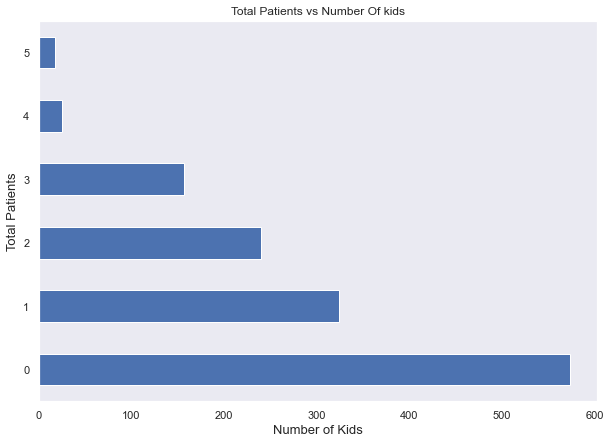

In [154]:
plt.figure(figsize=(10,7))
df.children.value_counts().sort_values().plot(kind='barh')
plt.xlabel('Number of Kids', size=13)
plt.ylabel('Total Patients', size=13)
plt.title('Total Patients vs Number Of kids')
plt.grid()
plt.show()

Average patients that smokes: 0.205
Average patients that do not smoke: 0.795
According currently our database indicates average person does not smoke greater than people who actually smoke.


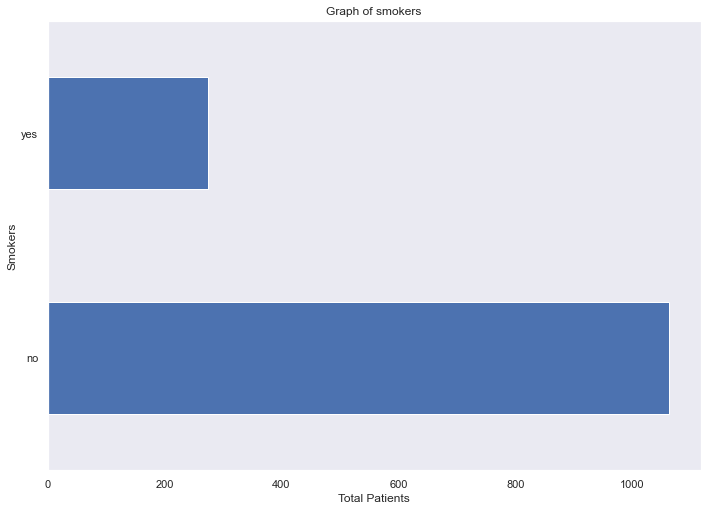

In [158]:
df.smoker.value_counts().plot(kind='barh')
plt.xlabel('Total Patients', size=12)
plt.ylabel('Smokers', size=12)
plt.title('Graph of smokers')
plt.grid()
patients.average_smoker()

Text(0, 0.5, 'BMI')

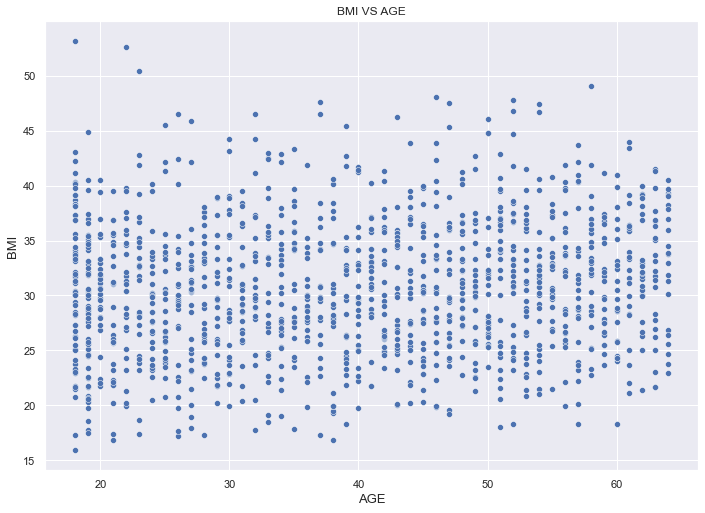

In [163]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('BMI VS AGE', size=12)
plt.xlabel('AGE', size=13)
plt.ylabel('BMI', size=13)

Text(0, 0.5, 'Patients Amount')

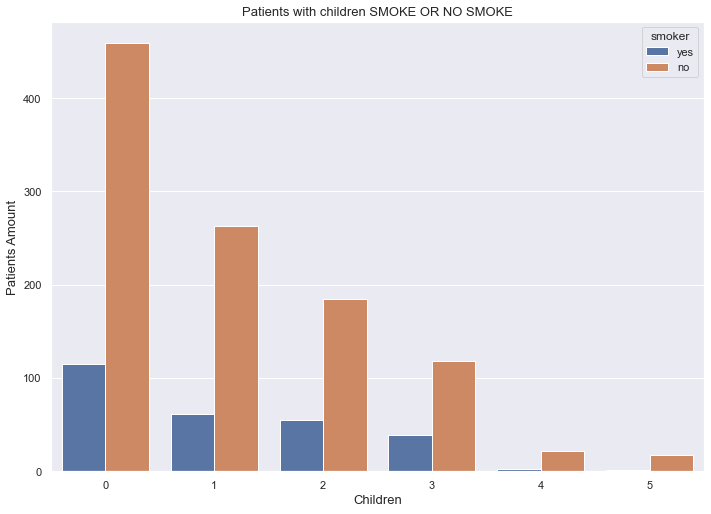

In [157]:
sns.countplot(x='children', data=df, hue='smoker')
plt.title('Patients with children SMOKE OR NO SMOKE', size=13)
plt.xlabel('Children', size=13)
plt.ylabel('Patients Amount', size=13)

* We can see that people with no child tend to not to smoke according our dataset. 

Text(0.5, 1.0, 'SEX VS BMI')

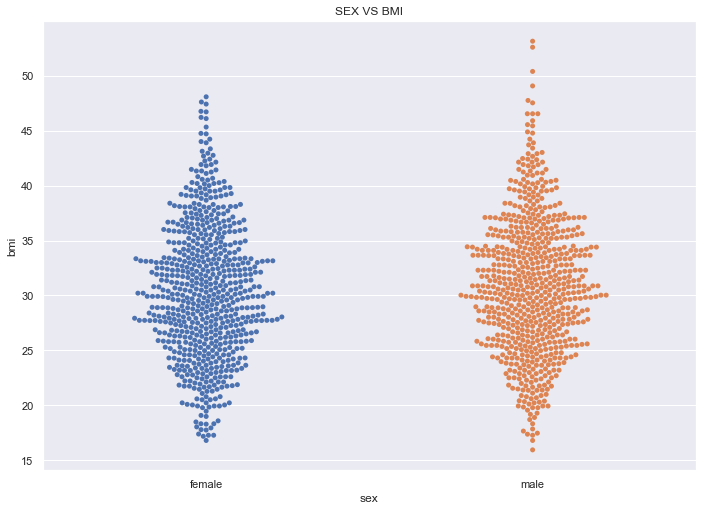

In [148]:
sns.swarmplot(x='sex', y='bmi', data=df)
plt.title('SEX VS BMI')

In [164]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Let's convert strings into integeres so we can visulize and try to guess insurance cost for per patient

In [167]:
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)
df['smoker'].replace('yes', 1, inplace=True)
df['smoker'].replace('no', 0, inplace=True)

In [168]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [170]:
df.drop('region', axis=1 , inplace=True)

In [176]:
X = df.drop('charges', axis=1)
y = df['charges']

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print("Our Model score is:", reg.score(X_train, y_train))


Our Model score is: 0.7410888590280913
